In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import numpy as np
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from PIL import Image

In [2]:
file_path = 'colors_normalized.csv'
df = pd.read_csv(file_path)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [3]:
f1_score(y_test, y_pred,average='macro')

np.float64(0.4166777299296837)

In [4]:
accuracy_score(y_test, y_pred)

0.4349084298081722

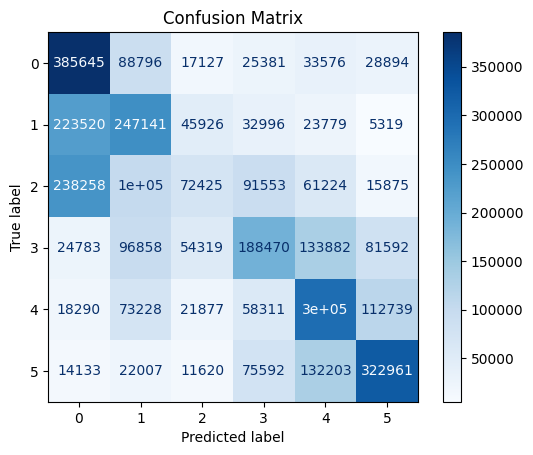

In [5]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [31]:
color_mapping = {
    '1': (60, 28, 255),
    '2': (73, 255, 52),
    '3': (255, 70, 70),
    '4': (7, 255, 251),
    '5': (88, 88, 88)
}

In [43]:
def create_mask(img, clf):
    mask = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i][j]
            pred = clf.predict([[pixel[0],pixel[1],pixel[2],i,j]])
            if pred == 0:
                continue
            mask[i][j] = color_mapping[str(pred[0])]
    plt.imshow(mask)
    plt.show()

In [ ]:
create_mask(np.array(Image.open("../Image Segmentation Data/denoised_quantized/1_MoS2_1.jpg")),clf)